# <font size=6.5> <font color = darkblue>Linear Discriminant Analysis

---

In [ ]:
import numpy as np   
import pandas as pd    
import seaborn as sns
import matplotlib.pyplot as plt 

In [ ]:
plt.rcParams['font.size']=16
plt.rcParams['axes.grid']=True
np.set_printoptions(suppress=True)

__Problem Statement: We want to classify the customers of a bank as defaulters or non-defaulters.__

In [ ]:
df = pd.read_csv('loan_default.csv')
df.head()

,Gender,LoanOffered,Job,WorkExp,CreditScore,EMIRatio,Status,CreditHistory,Ownhouse,Purpose,Dependents
0,Male,0,unskilled,14,86,3.0,No,poor,1,personal,2
1,Female,1,skilled,15,94,3.0,No,poor,1,personal,3
2,Male,0,unskilled,16,86,3.0,No,poor,1,personal,2
3,Female,1,skilled,13,94,3.0,No,poor,1,personal,3
4,Male,1,skilled,12,85,3.3,No,poor,1,personal,2


### Feature Description

| Variables        | Type           | Description  |
| ------------- |:-------------:| -----:|
| Gender      | Categorical | Male or Female |
| LoanOffered      | Indicator      |   Whether the Bank approached the customer for the loan: 1 indicates Bank did |
| Job | Categorical      |    Unskilled, Skilled, Management |
| WorkExp | Numeric | Years of professional experience|
| CreditScore | Numeric | Credit score during loan approval; high score indicates better borrower|
| EMIRatio | Numeric | Estimated EMI/Total assets during granting of loan|
| Status | Categorical | Default or Not|
| CreditHistory | Categorical | Previous history: Poor, Critical, Good or Very Good|
| Ownhouse | Indicator | 1 if own house|
| Purpose | Categorical | Purpose for borrowing: Car, Consumer durables or Personal|
| Dependents | Integer | Number of dependents|


#### First, let us check the number of rows (observations) and the number of columns (variables).

In [ ]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 781 
The number of columns (variables) is 11


#### Check for missing values.

In [ ]:
df.isnull().sum()

Gender           0
LoanOffered      0
Job              0
WorkExp          0
CreditScore      0
EMIRatio         0
Status           0
CreditHistory    0
Ownhouse         0
Purpose          0
Dependents       0
dtype: int64

There are no missing values in the dataset.

#### Check for the various data types.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 781 entries, 0 to 780
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Gender         781 non-null    object 
 1   LoanOffered    781 non-null    int64  
 2   Job            781 non-null    object 
 3   WorkExp        781 non-null    int64  
 4   CreditScore    781 non-null    int64  
 5   EMIRatio       781 non-null    float64
 6   Status         781 non-null    object 
 7   CreditHistory  781 non-null    object 
 8   Ownhouse       781 non-null    int64  
 9   Purpose        781 non-null    object 
 10  Dependents     781 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 67.2+ KB


### Creating Dummy Variables

Before splitting the data into train and test , let us go ahead and create the dummy variables appropriately.

In [ ]:
data = pd.get_dummies(df, drop_first=True)
data.head()

,LoanOffered,WorkExp,CreditScore,EMIRatio,Ownhouse,Dependents,Gender_Male,Job_skilled,Job_unskilled,Status_No,CreditHistory_good,CreditHistory_poor,CreditHistory_verygood,Purpose_consumerdurable,Purpose_education,Purpose_personal
0,0,14,86,3.0,1,2,1,0,1,1,0,1,0,0,0,1
1,1,15,94,3.0,1,3,0,1,0,1,0,1,0,0,0,1
2,0,16,86,3.0,1,2,1,0,1,1,0,1,0,0,0,1
3,1,13,94,3.0,1,3,0,1,0,1,0,1,0,0,0,1
4,1,12,85,3.3,1,2,1,1,0,1,0,1,0,0,0,1


---

## <font color = darkblue>Lets start by only taking two features: Credit Score and EMI Ratio

In [ ]:
data_mini = data.loc[:,['EMIRatio', 'WorkExp', 'Status_No']]
data_mini.head()

,EMIRatio,WorkExp,Status_No
0,3.0,14,1
1,3.0,15,1
2,3.0,16,1
3,3.0,13,1
4,3.3,12,1


In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test = train_test_split(data_mini, test_size=.3, random_state=1, stratify = data_mini.Status_No)

In [ ]:
X_Test.head()

,EMIRatio,WorkExp,Status_No
678,8.8,15,0
266,8.1,13,1
662,7.5,13,0
219,7.7,19,1
460,10.5,11,1


### Ronald A. Fisher formulated the Linear Discriminant in 1936. What is the concept behind it?

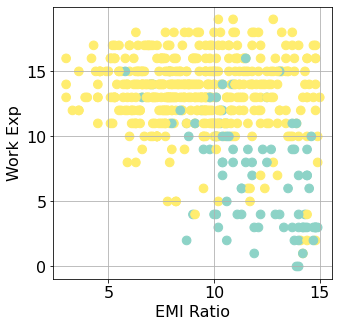

In [ ]:
plt.figure(figsize=(5,5))
plt.scatter(X_Train.EMIRatio, X_Train.WorkExp, c = X_Train.Status_No, cmap='Set3', s = 75)
plt.xlabel('EMI Ratio')
plt.ylabel('Work Exp')
plt.show()

# \begin{equation*}Z =   \beta_1x_1 + \beta_2x_2 + ..... \beta_nx_n  \end{equation*}
- ### Find Z, such that the below is maximised:
    * # \begin{equation*} \frac{(\mu_1 - \mu_2 )^2}{s_1^2 + s_2^2} \end{equation*}
    * ### One solution for the above problem is eigen value decomposition:
    * # \begin{equation*} \lambda w = S_W^{-1} S_B w \end{equation*}

## The above problem can be broken down to 5 steps:
#### 1. Compute the d-dimensional mean vectors for the different classes from the dataset.
#### 2. Compute the scatter matrices (in-between-class and within-class scatter matrix).
#### 3. Compute the eigenvectors (e1,e2,...,ed) and corresponding eigenvalues (λ1,λ2,...,λd) for the scatter matrices.
#### 4. Sort the eigenvectors by decreasing eigenvalues and choose k eigenvectors with the largest eigenvalues to form a d×k dimensional matrix W (where every column represents an eigenvector).
#### 5. Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication: Z=X×W (where X is a n×d-dimensional matrix representing the n samples, and z are the transformed n×k-dimensional samples in the new subspace).

### 1. Compute the d-dimensional mean vectors for the different classes from the dataset.

In [ ]:
class_feature_means = X_Train.groupby('Status_No').mean().T 
class_feature_means

Status_No,0,1
EMIRatio,11.757471,9.183007
WorkExp,7.264368,13.296296


### 2.a Compute the within-class Scatter matrix
#### The within-class-scatter matrices Sw and the between-class-scatter matrix SB contain all the basic information about the relationship within the groups and between them

## \begin{equation*}S_w = \sum S_i \end{equation*}
  
## \begin{equation*}S_i = \sum (x-m_i)(x-m_i)^T   \end{equation*}

#### i is a class, mi is sample mean for ith class and x is a sample row belonging to class i

In [ ]:
within_class_scatter_matrix = np.zeros((2,2)) # a 2,2 shape is chosen because there are 2 features, for 3 features the shape should be 3,3
for clas, rows in X_Train.groupby('Status_No'):
    rows = rows.drop(['Status_No'], axis=1)
    s = np.zeros((2,2)) # s variable will store the scatter matrix for each class in the loop
    
    for index, row in rows.iterrows():
        x, mc = row.values.reshape(2,1), class_feature_means[clas].values.reshape(2,1)
        s += (x - mc).dot((x - mc).T) 
    within_class_scatter_matrix += s # this represents the first equation, where we add scatter matrix for different classes.
    
print(within_class_scatter_matrix)

[[3822.22009466 -822.91072797]
 [-822.91072797 5138.62324393]]


In [ ]:
row

EMIRatio    14.0
WorkExp     10.0
Name: 617, dtype: float64

In [ ]:
X_Train.tail(1)

,EMIRatio,WorkExp,Status_No
617,14.0,10,1


### 2.b Compute the between-class Scatter matrix

## \begin{equation*}S_B = \sum N_i(m_i - m)(m_i-m)^T   \end{equation*}
#### m is overall mean, mi is sample mean for ith class and Ni is sample size for ith class

In [ ]:
# Applying the above formula
feature_means = X_Train.iloc[:, :-1].mean()
between_class_scatter_matrix = np.zeros((2, 2)) # a 2,2 shape is chosen because there are 2 features, for 3 features the shape should be 3,3
for clas in class_feature_means.columns:    
    n = len(X_Train.loc[X_Train['Status_No'] == clas])
    mc, m = class_feature_means[clas].values.reshape(2,1), feature_means.values.reshape(2,1) # vectors are reshaped to get appropriate shape after dot product
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)
print(between_class_scatter_matrix)

[[  484.74483208 -1135.74916214]
 [-1135.74916214  2661.04159123]]


### 3 and 4. Computing and sorting Eigen Values

* # \begin{equation*} \lambda w = S_W^{-1} S_B w \end{equation*}

In [ ]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

In [ ]:
eigen_values # We have to look at non zero eigen values for classification. 

array([0.        , 0.56912571])

In [ ]:
eigen_value = eigen_values[1]
print(eigen_value)

0.5691257116726863


In [ ]:
eigen_vectors

array([[-0.91973182,  0.36720258],
       [-0.39254728, -0.93014099]])

In [ ]:
eigen_vectors = eigen_vectors[:, 1].reshape(2,1)*-1 
# np.linalg.eig often reverses the sign of coefficients, that's why -1 is used a multiplier in the previous line
# We are only selecting eigen vector corresponing to the non zero eigen values.
print(eigen_vectors)

[[-0.36720258]
 [ 0.93014099]]


In [ ]:
data_mini.loc[:,['EMIRatio', 'WorkExp',]].head()

,EMIRatio,WorkExp
0,3.0,14
1,3.0,15
2,3.0,16
3,3.0,13
4,3.3,12


### 5. Matrix multiplication: Z=X×W

In [ ]:
X_lda = np.array(X_Train.loc[:,['EMIRatio', 'WorkExp',]].values.dot(eigen_vectors))
X_lda = X_lda.ravel()
X_lda[:5]

array([ 8.90930492,  5.29890173,  9.86403164,  8.93389065, 14.42916154])

In [ ]:
np.zeros_like(X_lda)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

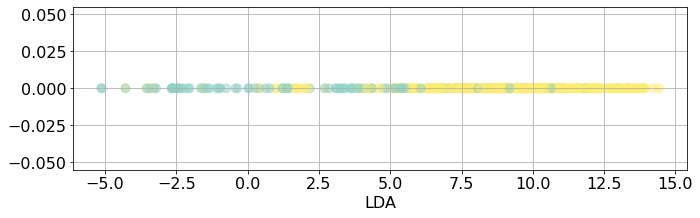

In [ ]:
plt.figure(figsize=(11,3))
plt.scatter(X_lda, np.zeros_like(X_lda), c = X_Train.Status_No, cmap='Set3', s = 75,  alpha = 0.5)
plt.xlabel('LDA')
plt.show()

### Finding the Cut-off value

#### Method 1: - We can use the arithmetic mean of the $\overline{Z}$ values for each class 

In [ ]:
class_feature_means

Status_No,0,1
EMIRatio,11.757471,9.183007
WorkExp,7.264368,13.296296


In [ ]:
eigen_vectors

array([[-0.36720258],
       [ 0.93014099]])

In [ ]:
eigen_vectors.reshape(1,2).dot(class_feature_means[0].values.reshape(2, 1))

array([[2.43951244]])

In [ ]:
X_lda[X_Train.Status_No==0].mean()

2.4395124395146173

In [ ]:
Z0_mean = X_lda[X_Train.Status_No==0].mean()

In [ ]:
Z1_mean = X_lda[X_Train.Status_No==1].mean()
Z1_mean

8.995406471812776

In [ ]:
Z_cut1 = (Z0_mean+Z1_mean)/2
Z_cut1

5.717459455663697

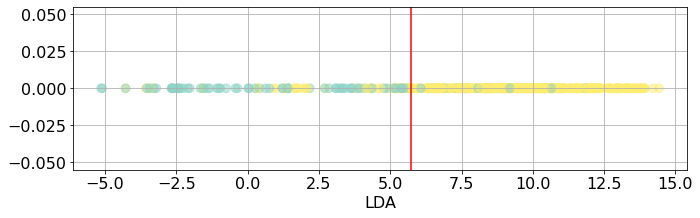

In [ ]:
plt.figure(figsize=(11,3))
plt.scatter(X_lda, np.zeros_like(X_lda), c = X_Train.Status_No, cmap='Set3', s = 75,  alpha = 0.5)
plt.axvline(Z_cut1, c = 'r')
plt.xlabel('LDA')
plt.show()

In [ ]:
preds = X_lda >= Z_cut1

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(X_Train.Status_No, preds)

0.8772893772893773

#### Method 2: - We can use the weighted mean of the $\overline{Z}$ values for each class 

In [ ]:
X_Train.Status_No.value_counts(normalize=True)

1    0.840659
0    0.159341
Name: Status_No, dtype: float64

In [ ]:
Z_cut2 = Z0_mean*0.16 + Z1_mean*0.84
Z_cut2

7.946463426645071

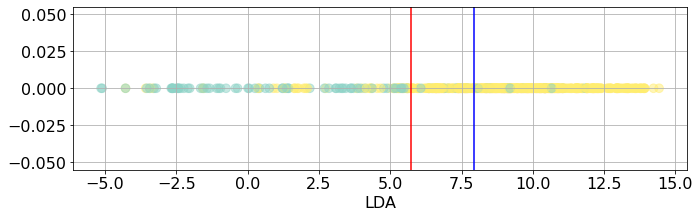

In [ ]:
plt.figure(figsize=(11,3))
plt.scatter(X_lda, np.zeros_like(X_lda), c = X_Train.Status_No, cmap='Set3', s = 75,  alpha = 0.5)
plt.axvline(Z_cut1, c = 'r')
plt.axvline(Z_cut2, c = 'b')
plt.xlabel('LDA')
plt.show()

In [ ]:
preds2 = X_lda >= Z_cut2

In [ ]:
accuracy_score(X_Train.Status_No, preds2)

0.7252747252747253

#### Method 3: - We can take the sum of the arithmetic mean of the $\overline{Z}$ values that we just calculated and the natural logarithmic ratio of the prior probabilites. 
This is a popular method in financial sector, to adjust cut off values where there is a class imbalance

In [ ]:
X_Train.Status_No.value_counts(normalize=True)

1    0.840659
0    0.159341
Name: Status_No, dtype: float64

In [ ]:
adj = np.log(0.840659/0.159341)
adj

1.6631395482483722

In [ ]:
Z_cut3 = Z_cut1 + adj
Z_cut3

7.380599003912069

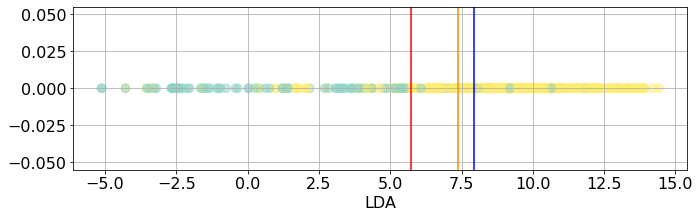

In [ ]:
plt.figure(figsize=(11,3))
plt.scatter(X_lda, np.zeros_like(X_lda), c = X_Train.Status_No, cmap='Set3', s = 75,  alpha = 0.5)
plt.axvline(Z_cut1, c = 'r')
plt.axvline(Z_cut2, c = 'b')
plt.axvline(Z_cut3, c = 'darkorange')
plt.xlabel('LDA')
plt.show()

In [ ]:
preds3 = X_lda >= Z_cut3

In [ ]:
preds*1

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
accuracy_score(X_Train.Status_No, preds3)

0.7838827838827839

#### Method 4: Using Baysian Rules
This is how probabilities are calculated in scikit for LDA. By default LDA does not give probabilities, unlike Logistic Rregression 

### Bayes Theorem:  

###  \begin{equation*}
P(A|B)= 
\frac{P(B|A) \times P(A)} {P(B)}
\end{equation*}

### \begin{equation*}
 P(y =k | x) = 
\frac{ P(x|y=k) \times P(y=k) }{P(x)} 
\end{equation*}

---

## Lets do it the easy way now!

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

In [ ]:
model = lda.fit(X_Train[['EMIRatio','WorkExp']], X_Train.Status_No)
X_lda2 = lda.transform(X_Train[['EMIRatio','WorkExp']])
X_lda2 = X_lda2.ravel() # ravel flattens a numpy array
# X_lda2

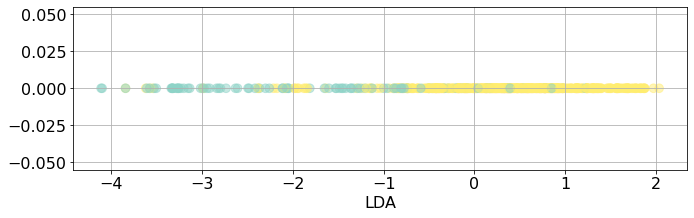

In [ ]:
plt.figure(figsize=(11,3))
plt.scatter(X_lda2, np.zeros_like(X_lda2), c = X_Train.Status_No, cmap='Set3', s = 75,  alpha = 0.5)
plt.xlabel('LDA')
plt.show()

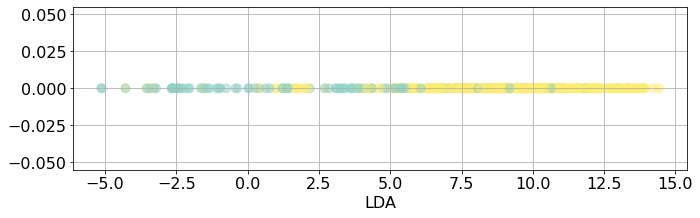

In [ ]:
plt.figure(figsize=(11,3))
plt.scatter(X_lda, np.zeros_like(X_lda), c = X_Train.Status_No, cmap='Set3', s = 75,  alpha = 0.5)
# alpha is used to create translucent points
plt.xlabel('LDA')
plt.show()

Even though the scales of the Zscores calculated from scratch and the one from Scikit, are on diffrent scales, the relative diffrence between the points is the same. This means that as far classification is concerned, we are goin to get samre results

In [ ]:
eigen_vectors

array([[-0.36720258],
       [ 0.93014099]])

In [ ]:
model.scalings_

array([[-0.11524118],
       [ 0.2919112 ]])

In [ ]:
scale = eigen_vectors[1] / model.scalings_[1]
scale

array([3.18638332])

In [ ]:
X_lda3 = (model.scalings_[0]*X_Train.EMIRatio + model.scalings_[1]*X_Train.WorkExp)*scale
# Convertig Z scores from LDA to the same scale as calculated by us using Eigen Value decomposition

In [ ]:
X_lda[:5]

array([ 8.90930492,  5.29890173,  9.86403164,  8.93389065, 14.42916154])

In [ ]:
X_lda3[:5]

516     8.909305
486     5.298902
306     9.864032
307     8.933891
95     14.429162
dtype: float64

In [ ]:
model.means_

array([[11.75747126,  7.26436782],
       [ 9.18300654, 13.2962963 ]])

In [ ]:
model.priors_ # The distribution frequency of classes

array([0.15934066, 0.84065934])

In [ ]:
model.score(X_Train[['EMIRatio','WorkExp']], X_Train.Status_No )

0.891941391941392

In [ ]:
model.predict(X_Train[['EMIRatio','WorkExp']])[:5]

array([1, 1, 1, 1, 1], dtype=uint8)

In [ ]:
model.predict_proba(X_Train[['EMIRatio','WorkExp']])[:5]

array([[0.02356511, 0.97643489],
       [0.19894899, 0.80105101],
       [0.01286095, 0.98713905],
       [0.02320257, 0.97679743],
       [0.00068299, 0.99931701]])

---

## Lets build a model on complete dataset now

In [ ]:
data.head()

,LoanOffered,WorkExp,CreditScore,EMIRatio,Ownhouse,Dependents,Gender_Male,Job_skilled,Job_unskilled,Status_No,CreditHistory_good,CreditHistory_poor,CreditHistory_verygood,Purpose_consumerdurable,Purpose_education,Purpose_personal
0,0,14,86,3.0,1,2,1,0,1,1,0,1,0,0,0,1
1,1,15,94,3.0,1,3,0,1,0,1,0,1,0,0,0,1
2,0,16,86,3.0,1,2,1,0,1,1,0,1,0,0,0,1
3,1,13,94,3.0,1,3,0,1,0,1,0,1,0,0,0,1
4,1,12,85,3.3,1,2,1,1,0,1,0,1,0,0,0,1


In [ ]:
X = data.drop('Status_No', axis=1)
Y = data.Status_No

In [ ]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=.30, random_state=1, stratify = Y)

In [ ]:
full_model = lda.fit(X_Train, Y_Train)

In [ ]:
y_train_predict = full_model.predict(X_Train)
y_test_predict = full_model.predict(X_Test)

In [ ]:
y_train_predict_prob = full_model.predict_proba(X_Train) # Getting probabilities
y_test_predict_prob = full_model.predict_proba(X_Test)

In [ ]:
accuracy_score(Y_Train, y_train_predict)

0.9908424908424909

### Lets check accuracy at various thresholds

In [ ]:
threshold_range = np.arange(0.4, 0.8, 0.1) # Trying thresholds 0.4, 0.5, 0.6, 0.7

In [ ]:
for thresh in threshold_range:
    print(thresh)
    print(accuracy_score(Y_Train, y_train_predict_prob[:, 1]>thresh))
    print('\n')

0.4
0.9908424908424909


0.5
0.9908424908424909


0.6
0.9835164835164835


0.7
0.9743589743589743




### Lets check confusion matrix at various thresholds

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

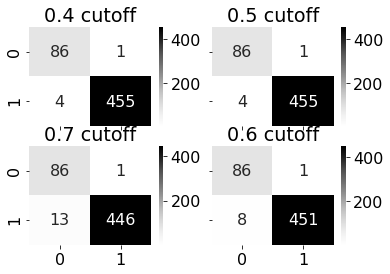

In [ ]:
f,a =  plt.subplots(2,2,sharex=True,sharey=True)

plot_00 = sns.heatmap((confusion_matrix(Y_Train, y_train_predict_prob[:, 1]>0.4)),annot=True,fmt='.5g'
            ,cmap='Greys',ax=a[0][0]);
a[0][0].set_title('0.4 cutoff')
plot_01 = sns.heatmap((confusion_matrix(Y_Train,y_train_predict_prob[:, 1]>0.5)),annot=True,fmt='.5g'
            ,cmap='Greys',ax=a[0][1]);
a[0][1].set_title('0.5 cutoff');
plot_02 = sns.heatmap((confusion_matrix(Y_Train,y_train_predict_prob[:, 1]>0.6)),annot=True,fmt='.5g'
            ,cmap='Greys',ax=a[1][1]);
a[1][1].set_title('0.6 cutoff');
plot_03 = sns.heatmap((confusion_matrix(Y_Train,y_train_predict_prob[:, 1]>0.7)),annot=True,fmt='.5g'
            ,cmap='Greys',ax=a[1][0]);
a[1][0].set_title('0.7 cutoff');

In all the cases we just have one sample incorrectly mentioned as Non defaulting, when the person is defaulting 

In [ ]:
print(classification_report(Y_Train, y_train_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        87
           1       1.00      0.99      0.99       459

    accuracy                           0.99       546
   macro avg       0.98      0.99      0.98       546
weighted avg       0.99      0.99      0.99       546



AUC: 0.997


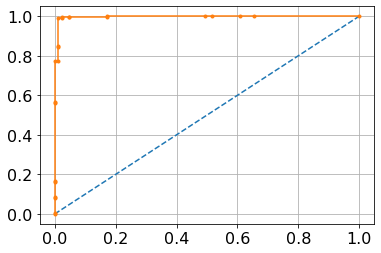

In [ ]:
auc = roc_auc_score(Y_Train, y_train_predict_prob[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % auc)

fpr, tpr, thresholds = roc_curve(Y_Train, y_train_predict_prob[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

#### Lets check if the performance on test set matches with the training set

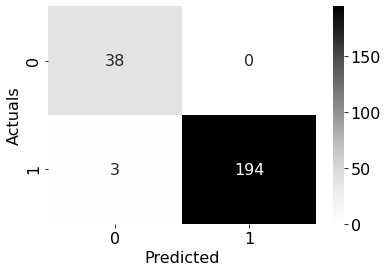

True Negative: 38 
False Positives: 0 
False Negatives: 3 
True Positives: 194 

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        38
           1       1.00      0.98      0.99       197

    accuracy                           0.99       235
   macro avg       0.96      0.99      0.98       235
weighted avg       0.99      0.99      0.99       235



In [ ]:
sns.heatmap((confusion_matrix(Y_Test,y_test_predict)),annot=True,fmt='.5g',cmap='Greys');
plt.xlabel('Predicted');
plt.ylabel('Actuals');
plt.show()
tn, fp, fn, tp = confusion_matrix(Y_Test,y_test_predict).ravel()
print('True Negative:',tn,'\n''False Positives:' ,fp,'\n''False Negatives:', fn,'\n''True Positives:', tp,'\n')
print(classification_report(Y_Test,y_test_predict))

AUC: 0.998


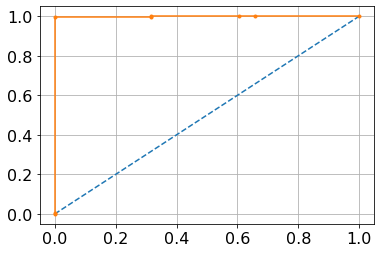

In [ ]:
# AUC and ROC for the testing data
auc = roc_auc_score(Y_Test,y_test_predict_prob[:, 1])#keeping only the probabilities for the desired class outcome
print('AUC: %.3f' % auc)
fpr, tpr, thresholds = roc_curve(Y_Test,y_test_predict_prob[:, 1])#keeping only the probabilities for the desired 
#class outcome
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

# END